In [13]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os

import random
import matplotlib.pylab as plt

In [14]:
from environment import ETFEnvironment, CryptoEnvironment
from utils import *

In [65]:
N_ASSETS = 26 # 53
WINDOW_FIT = 30
WINDOW_HOLD = 7
env = CryptoEnvironment('./data/portfolio.csv') # ETFEnvironment

In [66]:
from agent import HRPAgent, SmoothingAgent

In [67]:
agent_hrp = SmoothingAgent(N_ASSETS, allow_short=True)
agent_smooth = HRPAgent(N_ASSETS, allow_short=True)

In [68]:
actions_equal, actions_hrp, actions_smooth = [], [], []
result_equal, result_hrp, result_smooth = [], [], []

for i in range(WINDOW_FIT, len(env.data), WINDOW_HOLD):
    
    state = env.get_state(i, WINDOW_FIT, is_cov_matrix=False)
    
    action_equal = np.ones(N_ASSETS) / N_ASSETS
    action_hrp = agent_hrp.act(state)
    action_smooth = agent_smooth.act(state)

    state_action = env.get_state(i+WINDOW_HOLD, WINDOW_HOLD, is_cov_matrix=False)
    
    r = np.dot(state_action, action_equal)
    result_equal.append(r.tolist())
    actions_equal.append(action_equal)
    
    r = np.dot(state_action, action_hrp)
    result_hrp.append(r.tolist())
    actions_hrp.append(action_hrp)
    
    r = np.dot(state_action, action_smooth)
    result_smooth.append(r.tolist())
    actions_smooth.append(action_smooth)

In [69]:
result_equal_vis = [item for sublist in result_equal for item in sublist]
result_hrp_vis = [item for sublist in result_hrp for item in sublist]
result_smooth_vis = [item for sublist in result_smooth for item in sublist]

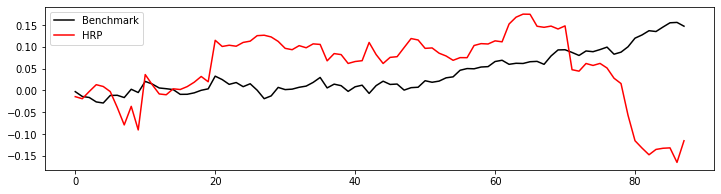

In [73]:
plt.figure(figsize = (12, 3))
plt.plot(np.array(result_equal_vis).cumsum(), label = 'Benchmark', color = 'black')
plt.plot(np.array(result_hrp_vis).cumsum(), label = 'HRP', color = 'red')
# plt.plot(np.array(result_smooth_vis).cumsum(), label = 'Forecasting', color = 'blue')
plt.legend()
plt.show()

In [74]:
print(sharpe(np.array(result_equal_vis).cumsum()))
print(sharpe(np.array(result_hrp_vis).cumsum()))
# print(sharpe(np.array(result_smooth_vis).cumsum()))

2.6832722188103326
-0.6466666029275073


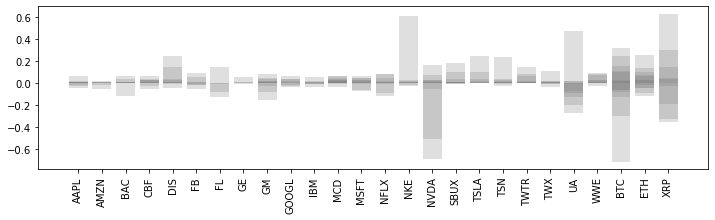

In [75]:
plt.figure(figsize = (12, 3))
for a in actions_hrp:    
    plt.bar(np.arange(N_ASSETS), a, color = 'grey', alpha = 0.25)
    plt.xticks(np.arange(N_ASSETS), env.data.columns, rotation='vertical')
plt.show()